## TPI INTELIGENCIA ARTIFICIAL - UTN FRRe - 2023

Integrantes:
+ Bordes, Facundo
+ Snaider, Matias
+ Zozaya, Juan Pablo

### Analisis y preparacion del dataset

Import de las librerias necesarias

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
#from ydata_profiling import ProfileReport

Se importa el dataset y se lo guarda como un DataFrame para poder trabajarlo

In [16]:
data = pd.read_csv('../datasets/data_cardiovascular_risk.csv')
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


Se renombran las columnas para un mejor entendimiento

In [17]:
data.rename(columns={'age': 'edad', 'education':'educacion', 'sex':'sexo', 'is_smoking':'fumador', 'cigsPerDay':'cigarrillos_por_dia','BPMeds':'toma_medicamentos_pre_art','prevalentStroke':'derrame_cerebral','prevalentHyp':'hipertenso','diabetes':'diabetico','totChol':'colesterol_total','sysBP':'presion_sistolica','diaBP':'presion_diastolica','BMI':'indice_masa_corporal','heartRate':'ritmo_cardiaco','glucose':'glucosa','TenYearCHD':'riesgo_cardiovascular_10_anios'}, inplace=True)
data.head()

,id,edad,educacion,sexo,fumador,cigarrillos_por_dia,toma_medicamentos_pre_art,derrame_cerebral,hipertenso,diabetico,colesterol_total,presion_sistolica,presion_diastolica,indice_masa_corporal,ritmo_cardiaco,glucosa,riesgo_cardiovascular_10_anios
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [18]:
data.to_csv('data_cardiovascular_risk_v2.csv', index=False)

In [19]:
data2_test = pd.read_csv('../datasets/data_cardiovascular_risk.csv')

Cantidad de filas y columnas del dataset

In [20]:
data.shape

(3390, 17)

Tipo de datos de cada atributo

In [21]:
data.dtypes

id                                  int64
edad                                int64
educacion                         float64
sexo                               object
fumador                            object
cigarrillos_por_dia               float64
toma_medicamentos_pre_art         float64
derrame_cerebral                    int64
hipertenso                          int64
diabetico                           int64
colesterol_total                  float64
presion_sistolica                 float64
presion_diastolica                float64
indice_masa_corporal              float64
ritmo_cardiaco                    float64
glucosa                           float64
riesgo_cardiovascular_10_anios      int64
dtype: object

Vemos cuantos registro hay de cada clase

In [22]:
data.value_counts('riesgo_cardiovascular_10_anios')

riesgo_cardiovascular_10_anios
0    2879
1     511
Name: count, dtype: int64

Buscamos los nulls

In [23]:
filas_con_nulos = data[data.isnull().any(axis=1)] #Verifica en cada fila, si hay alguna columna con un valor null
filas_con_nulos.to_csv('rows_with_nulls.csv', index=False)
filas_con_nulos

,id,edad,educacion,sexo,fumador,cigarrillos_por_dia,toma_medicamentos_pre_art,derrame_cerebral,hipertenso,diabetico,colesterol_total,presion_sistolica,presion_diastolica,indice_masa_corporal,ritmo_cardiaco,glucosa,riesgo_cardiovascular_10_anios
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0
10,10,61,1.0,F,NO,0.0,0.0,0,1,0,NaN,185.0,121.0,35.22,80.0,NaN,0
36,36,46,3.0,F,NO,0.0,0.0,0,0,0,193.0,106.5,70.5,26.18,75.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3349,3349,46,2.0,F,NO,0.0,0.0,0,0,0,242.0,129.0,85.0,27.40,80.0,NaN,1
3370,3370,46,1.0,F,YES,30.0,0.0,0,0,0,219.0,107.0,69.0,21.40,66.0,NaN,0
3378,3378,39,3.0,F,YES,NaN,0.0,0,0,0,197.0,126.5,76.5,19.71,55.0,63.0,0
3379,3379,39,1.0,M,YES,30.0,0.0,0,0,0,292.0,120.0,85.0,31.09,85.0,NaN,0


Vemos cuales son las columnas que presentnan nulos

In [24]:
columnas_con_nulos = data.columns[data.isnull().any()].tolist()
print("Columnas con valores nulos:")
print(columnas_con_nulos)

Columnas con valores nulos:
['educacion', 'cigarrillos_por_dia', 'toma_medicamentos_pre_art', 'colesterol_total', 'indice_masa_corporal', 'ritmo_cardiaco', 'glucosa']


Analisis de la distribucion de columnas con datos nulos

In [25]:
from distnormal import plot_distribucion_columnas

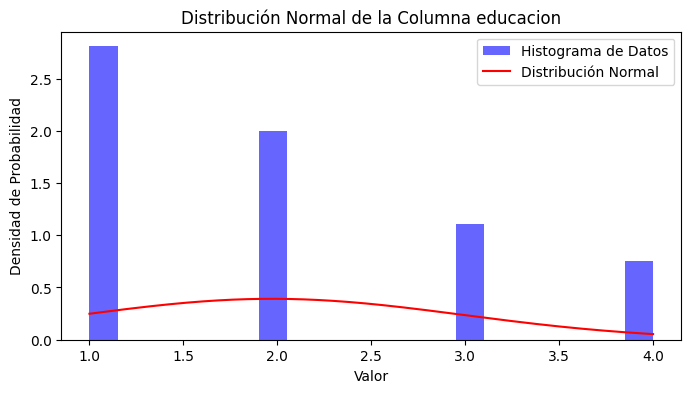

In [26]:
plot_distribucion_columnas(data['educacion'], 'educacion')

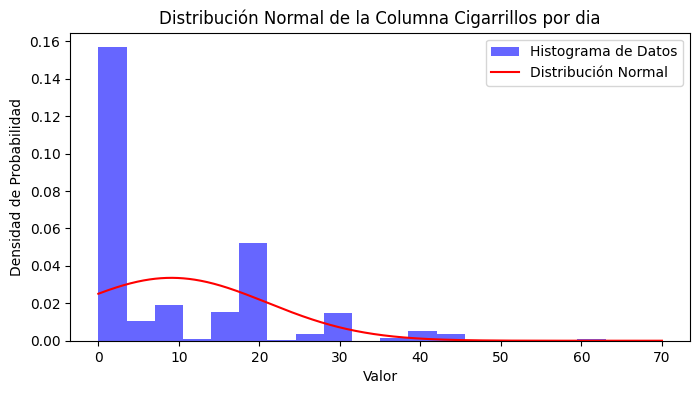

In [27]:
plot_distribucion_columnas(data['cigarrillos_por_dia'], 'Cigarrillos por dia')

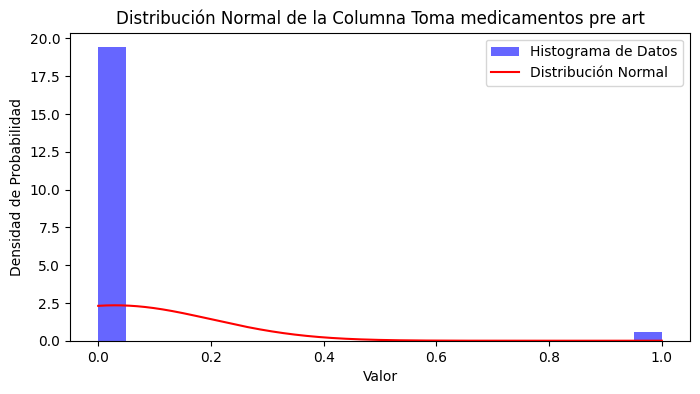

In [28]:
plot_distribucion_columnas(data['toma_medicamentos_pre_art'], 'Toma medicamentos pre art')

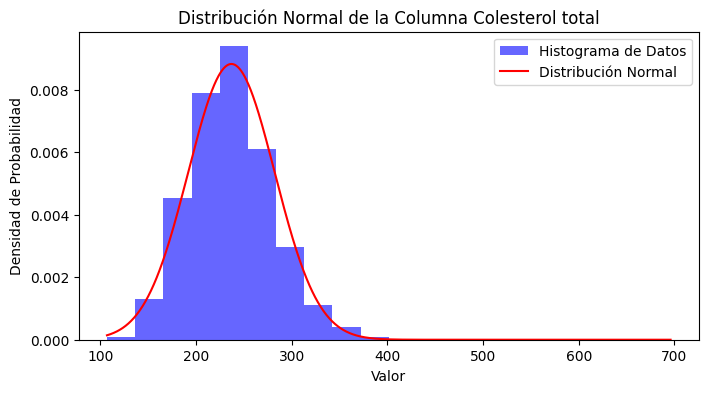

In [29]:
plot_distribucion_columnas(data['colesterol_total'], 'Colesterol total')

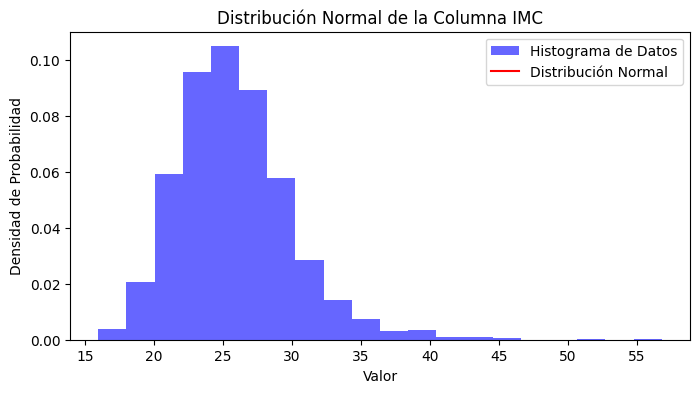

In [30]:
plot_distribucion_columnas(data['indice_masa_corporal'], 'IMC')

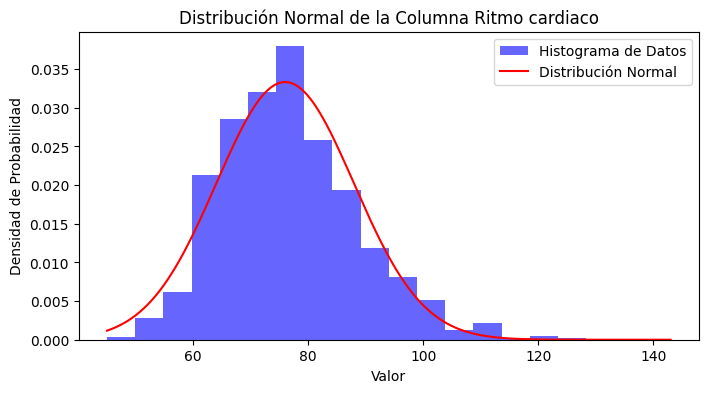

In [31]:
plot_distribucion_columnas(data['ritmo_cardiaco'], 'Ritmo cardiaco')

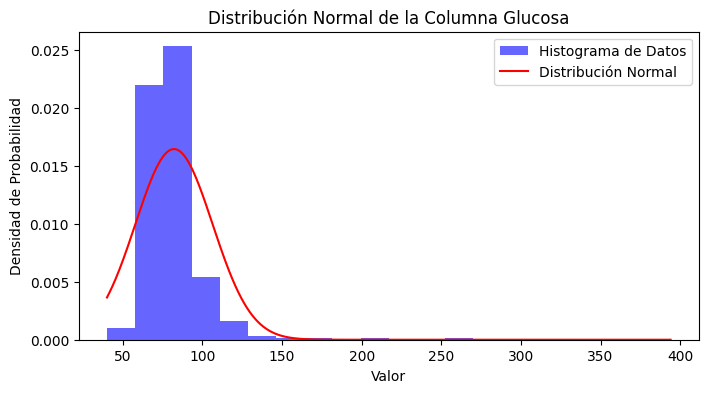

In [32]:
plot_distribucion_columnas(data['glucosa'], 'Glucosa')

#### Analisis descriptivo Dataset original

In [33]:
####data_rep = ProfileReport(data, title="Profiling Report TPI IA 2023")

In [34]:
#data_rep.to_file("data_cardiovascular_risk.html")

#### Rellenado de nulos

Genero otro DF para trabajar y completar los nulos

In [35]:
data_res = pd.read_csv('../datasets/data_cardiovascular_risk.csv')
data_res.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [36]:
data_res.rename(columns={'age': 'edad', 'education':'educacion', 'sex':'sexo', 'is_smoking':'fumador', 'cigsPerDay':'cigarrillos_por_dia','BPMeds':'toma_medicamentos_pre_art','prevalentStroke':'derrame_cerebral','prevalentHyp':'hipertenso','diabetes':'diabetico','totChol':'colesterol_total','sysBP':'presion_sistolica','diaBP':'presion_diastolica','BMI':'indice_masa_corporal','heartRate':'ritmo_cardiaco','glucose':'glucosa','TenYearCHD':'riesgo_cardiovascular_10_anios'}, inplace=True)
data_res.head()

,id,edad,educacion,sexo,fumador,cigarrillos_por_dia,toma_medicamentos_pre_art,derrame_cerebral,hipertenso,diabetico,colesterol_total,presion_sistolica,presion_diastolica,indice_masa_corporal,ritmo_cardiaco,glucosa,riesgo_cardiovascular_10_anios
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


Vamos a rellenar los NaN utilizando la libreria Numpy. La logica que decidimos llevar es la de agrupar por sexo y edad, ya que son campos que consdieramos suficientemente representativos para tomar el promedio, cuyo valor es el que se va a reemplazar en el campo correspondiente

In [37]:
promedios_por_grupo = data_res.groupby(['sexo', 'edad'])['cigarrillos_por_dia'].transform('mean').fillna(0).astype(int)
data_res['cigarrillos_por_dia'].fillna(promedios_por_grupo, inplace=True)
data_res.iloc[3378]

id                                 3378
edad                                 39
educacion                           3.0
sexo                                  F
fumador                             YES
cigarrillos_por_dia                 7.0
toma_medicamentos_pre_art           0.0
derrame_cerebral                      0
hipertenso                            0
diabetico                             0
colesterol_total                  197.0
presion_sistolica                 126.5
presion_diastolica                 76.5
indice_masa_corporal              19.71
ritmo_cardiaco                     55.0
glucosa                            63.0
riesgo_cardiovascular_10_anios        0
Name: 3378, dtype: object

In [38]:
promedios_por_grupo = data_res.groupby(['sexo', 'edad'])['colesterol_total'].transform('mean').fillna(0).astype(int)
data_res['colesterol_total'].fillna(promedios_por_grupo, inplace=True)

In [39]:
promedios_por_grupo = data_res.groupby(['sexo', 'edad'])['indice_masa_corporal'].transform('mean').fillna(0).astype(int)
data_res['indice_masa_corporal'].fillna(promedios_por_grupo, inplace=True)

In [40]:
promedios_por_grupo = data_res.groupby(['sexo', 'edad'])['ritmo_cardiaco'].transform('mean').fillna(0).astype(int)
data_res['ritmo_cardiaco'].fillna(promedios_por_grupo, inplace=True)

In [41]:
promedios_por_grupo = data_res.groupby(['sexo', 'edad'])['glucosa'].transform('mean').fillna(0).astype(int)
data_res['glucosa'].fillna(promedios_por_grupo, inplace=True)

In [42]:
promedios_por_grupo = data_res.groupby(['sexo', 'edad'])['educacion'].transform('mean').fillna(0).astype(int)
data_res['educacion'].fillna(promedios_por_grupo, inplace=True)

In [43]:
promedios_por_grupo = data_res.groupby(['sexo', 'edad'])['toma_medicamentos_pre_art'].transform(lambda x: 0 if (x == 0).sum() >= (x == 1).sum() else 1).fillna(0).astype(int)
data_res['toma_medicamentos_pre_art'].fillna(promedios_por_grupo, inplace=True)
data_res.tail()

,id,edad,educacion,sexo,fumador,cigarrillos_por_dia,toma_medicamentos_pre_art,derrame_cerebral,hipertenso,diabetico,colesterol_total,presion_sistolica,presion_diastolica,indice_masa_corporal,ritmo_cardiaco,glucosa,riesgo_cardiovascular_10_anios
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


Guardamos en un nuevo csv el dataset completo

In [44]:
data_res.head
#data_res.to_csv('data_completa.csv', index=False)

<bound method NDFrame.head of         id  edad  educacion sexo fumador  cigarrillos_por_dia  \
0        0    64        2.0    F     YES                  3.0   
1        1    36        4.0    M      NO                  0.0   
2        2    46        1.0    F     YES                 10.0   
3        3    50        1.0    M     YES                 20.0   
4        4    64        1.0    F     YES                 30.0   
...    ...   ...        ...  ...     ...                  ...   
3385  3385    60        1.0    F      NO                  0.0   
3386  3386    46        1.0    F      NO                  0.0   
3387  3387    44        3.0    M     YES                  3.0   
3388  3388    60        1.0    M      NO                  0.0   
3389  3389    54        3.0    F      NO                  0.0   

      toma_medicamentos_pre_art  derrame_cerebral  hipertenso  diabetico  \
0                           0.0                 0           0          0   
1                           0.0      

Aca vamos a validar que no quedan columnas con nulos

In [45]:
data

,id,edad,educacion,sexo,fumador,cigarrillos_por_dia,toma_medicamentos_pre_art,derrame_cerebral,hipertenso,diabetico,colesterol_total,presion_sistolica,presion_diastolica,indice_masa_corporal,ritmo_cardiaco,glucosa,riesgo_cardiovascular_10_anios
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [46]:
data_res

,id,edad,educacion,sexo,fumador,cigarrillos_por_dia,toma_medicamentos_pre_art,derrame_cerebral,hipertenso,diabetico,colesterol_total,presion_sistolica,presion_diastolica,indice_masa_corporal,ritmo_cardiaco,glucosa,riesgo_cardiovascular_10_anios
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,26.00,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [47]:
data_final = data_res
data_final['sexo'] = data['sexo'].replace({'M': 1, 'F': 0})
data_final['fumador'] = data['fumador'].replace({'YES': 1, 'NO': 0})
data_final.head()
data_final.to_csv('../datasets/data_cardiovascular_risk_final.csv', index=False)

Verificamos que no quedan columnas nulas en el nuevo DF

In [48]:
columnas_con_nulos = data_res.columns[data_res.isnull().any()].tolist()
print("Columnas con valores nulos:")
print(columnas_con_nulos)

Columnas con valores nulos:
[]


#### Control y comparacion de distribuciones

Solamente con las columnas que presentaban nulos, que son las siguentes:

         1. educacion
         2. cigarrillos_por_dia
         3. toma_medicamentos_pre_art
         4. colesterol_total
         5. indice_masa_corporal
         6. ritmo_cardiaco
         7. glucosa

Empezando con educacion, tenemos la distrubucion nueva con el rellenado de nulos

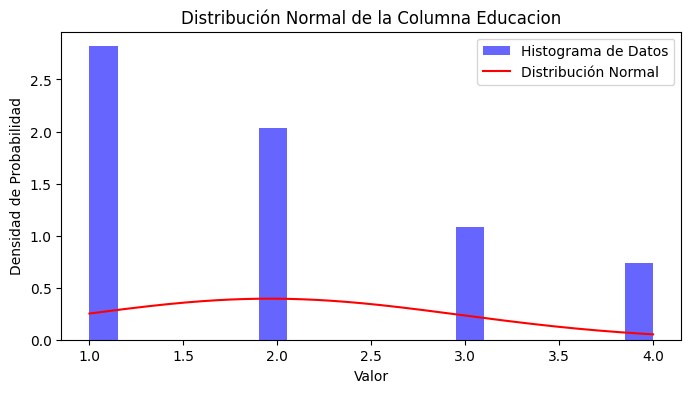

In [49]:
plot_distribucion_columnas(data_res['educacion'], 'Educacion')

Aca tenemos la distribucion con el dataset en su estado original

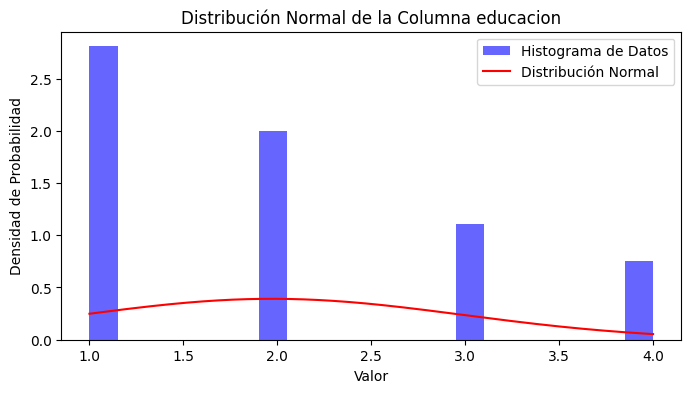

In [50]:
plot_distribucion_columnas(data['educacion'], 'educacion')

Ahora con cigarrillos_por_dia, tenemos la distrubucion nueva con el rellenado de nulos

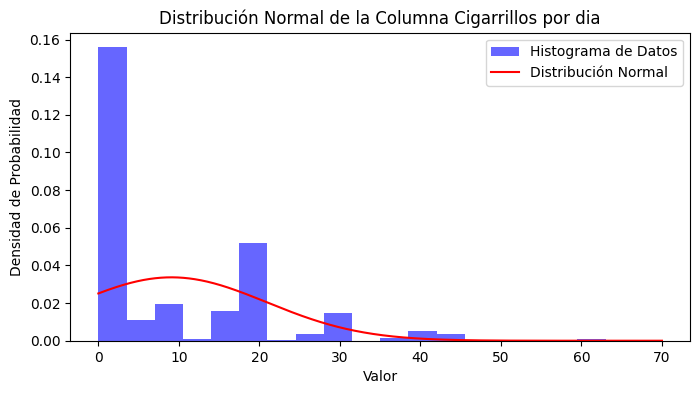

In [51]:
plot_distribucion_columnas(data_res['cigarrillos_por_dia'], 'Cigarrillos por dia')

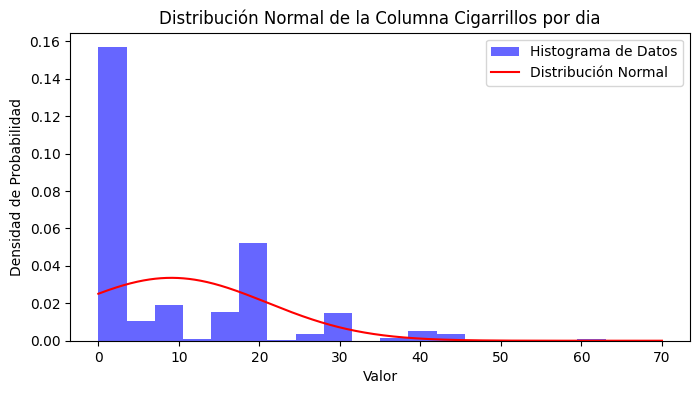

In [52]:
plot_distribucion_columnas(data['cigarrillos_por_dia'], 'Cigarrillos por dia')

Ahora con toma_medicamentos_pre_art, tenemos la distrubucion nueva con el rellenado de nulos

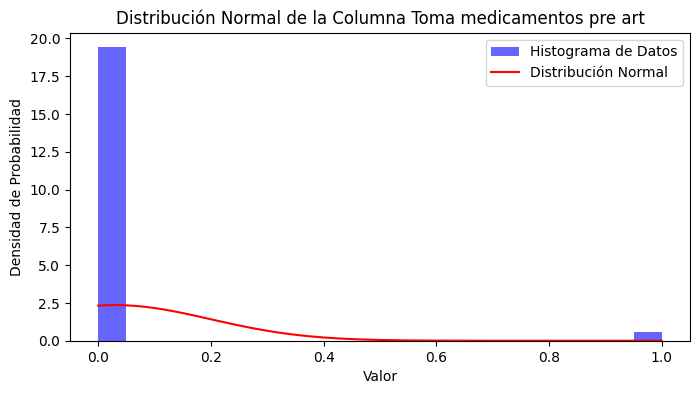

In [53]:
plot_distribucion_columnas(data_res['toma_medicamentos_pre_art'], 'Toma medicamentos pre art')

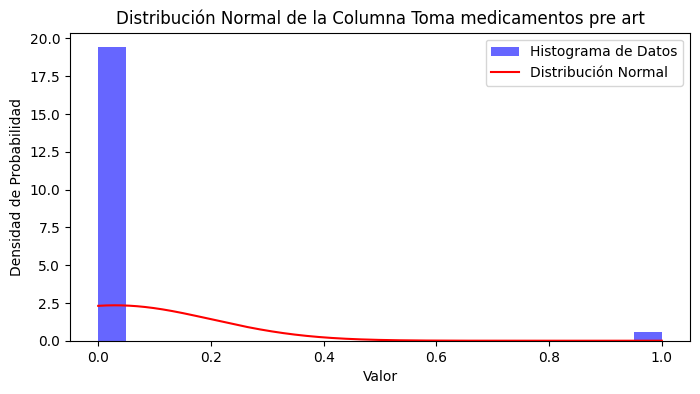

In [54]:
plot_distribucion_columnas(data['toma_medicamentos_pre_art'], 'Toma medicamentos pre art')

Ahora con colesterol_total, tenemos la distrubucion nueva con el rellenado de nulos

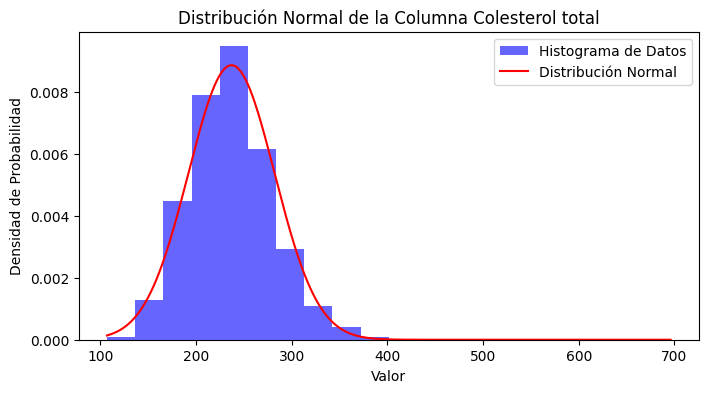

In [55]:
plot_distribucion_columnas(data_res['colesterol_total'], 'Colesterol total')

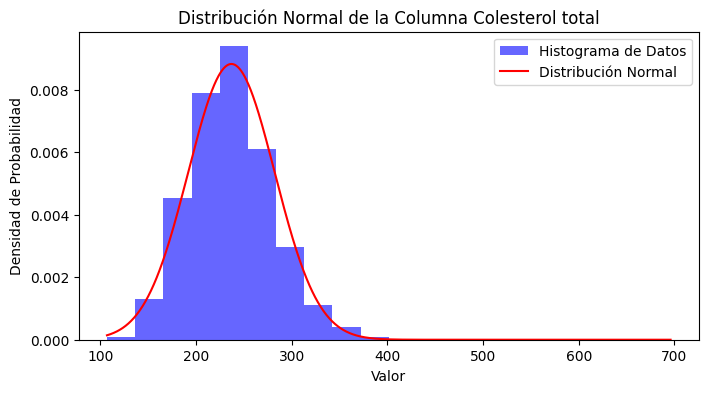

In [56]:
plot_distribucion_columnas(data['colesterol_total'], 'Colesterol total')

Ahora con indice_masa_corporal, tenemos la distrubucion nueva con el rellenado de nulos

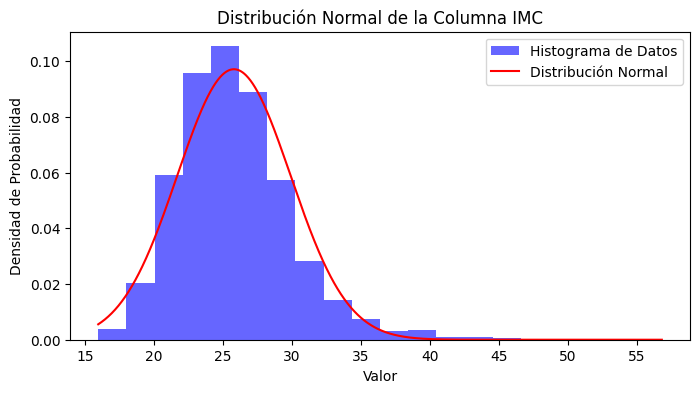

In [57]:
plot_distribucion_columnas(data_res['indice_masa_corporal'], 'IMC')

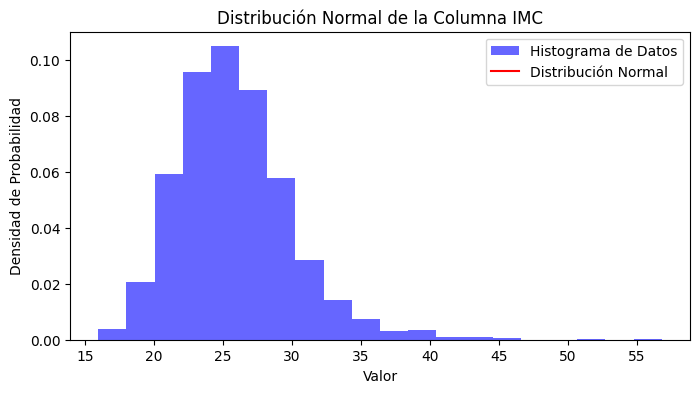

In [58]:
plot_distribucion_columnas(data['indice_masa_corporal'], 'IMC')

Ahora con ritmo_cardiaco, tenemos la distrubucion nueva con el rellenado de nulos

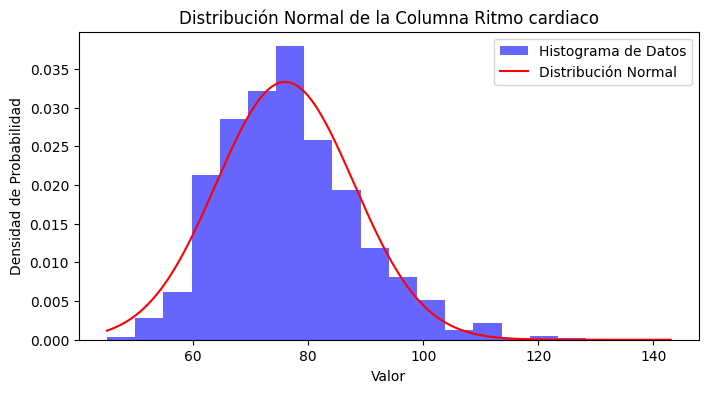

In [59]:
plot_distribucion_columnas(data_res['ritmo_cardiaco'], 'Ritmo cardiaco')

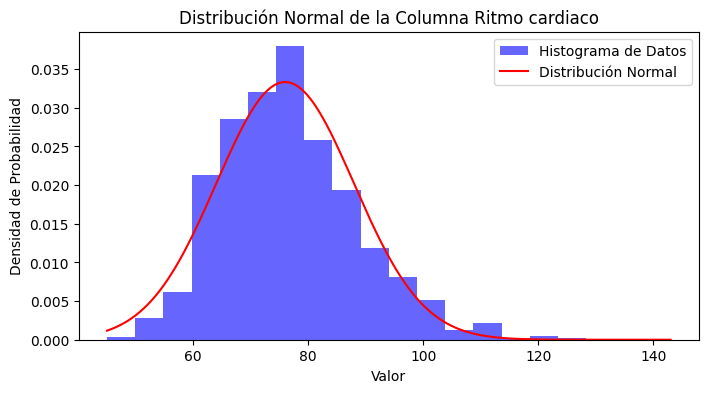

In [60]:
plot_distribucion_columnas(data['ritmo_cardiaco'], 'Ritmo cardiaco')

Ahora con glucosa, tenemos la distrubucion nueva con el rellenado de nulos

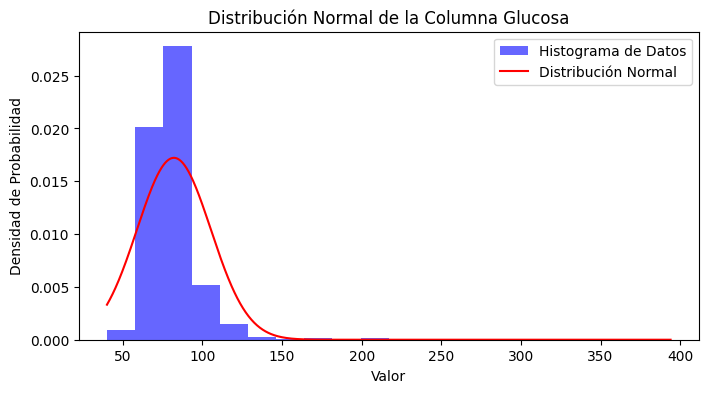

In [61]:
plot_distribucion_columnas(data_res['glucosa'], 'Glucosa')

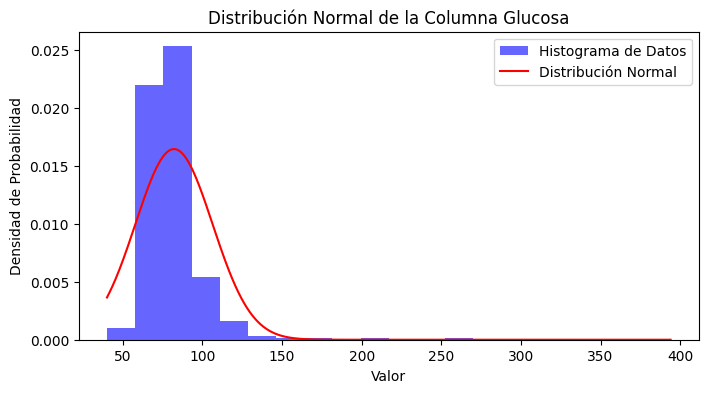

In [62]:
plot_distribucion_columnas(data['glucosa'], 'Glucosa')

Analizando todos los graficos, vemos que la distribucion en todas las columnas que completamos los nulos no presenta cambios significativos.Por ende, validamos que la forma que elegimos para completar los nulls fue la correcta. 
A partir de esta situacion, procederemos a realizar la implementacion del Algoritmo KNN.

## Implementacion y Prueba del Algoritmo KNN